### IMPORTS

In [ ]:
from Inference import BBVI 
import torch
import matplotlib.pyplot as plt

### EXAMPLE

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [3]:
# load data
data = torch.load('Data/foong_data.pt')
x_data = data[0].to(device)
y_data = data[1].to(device)
y_data = y_data.unsqueeze(-1)

In [4]:
Net = BBVI.VariationalNetwork(input_size=1, output_size=1, layer_width=30, nb_layers=2, device=device)

In [5]:
Net.make_deterministic_rhos()

In [7]:
Net.lock_rhos()

In [9]:
optimizer = torch.optim.Adam
optimizer_params = {'lr': 0.05}

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau
scheduler_params = {'patience': 3, 'factor': 0.8}

In [10]:
voptimizer = BBVI.VariationalOptimizer(model=Net, sigma_noise=0.1, optimizer=optimizer, optimizer_params=optimizer_params, scheduler=scheduler, scheduler_params=scheduler_params)

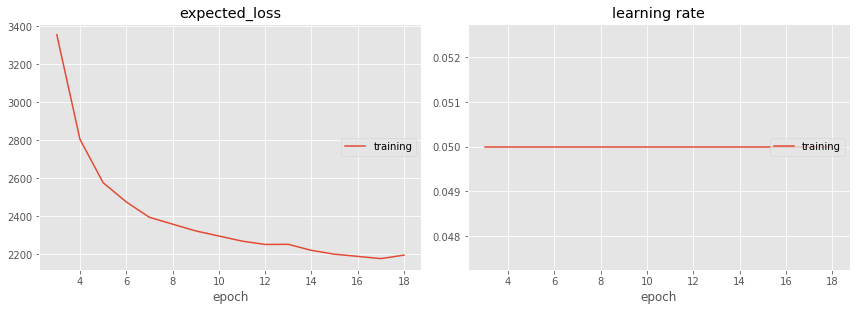

expected_loss:
training   (min: 2175.578, max: 53335.336, cur: 2193.879)

learning rate:
training   (min:    0.050, max:    0.050, cur:    0.050)


KeyboardInterrupt: 

In [11]:
Net = voptimizer.run((x_data,y_data), n_epoch=1000, n_iter=100, n_ELBO_samples=500, plot=True)

In [ ]:
x_test = torch.linspace(-2.0, 2.0).unsqueeze(1).to(device)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.scatter(x_data.cpu(), y_data.cpu())
for _ in range(1000):
    Net.resample_parameters()

    y_test = Net.forward(x_test)
    plt.plot(x_test.detach().cpu().numpy(), y_test.squeeze(0).detach().cpu().numpy(), alpha=0.05, linewidth=1, color='lightblue')